In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from path_info import DATA_DIR

In [3]:
import os

In [4]:
data_path = os.path.join(DATA_DIR, 'prefecture_data_with_pairs_info_v2.csv')

In [5]:
data = pd.read_csv(data_path)
df = pd.DataFrame(data)

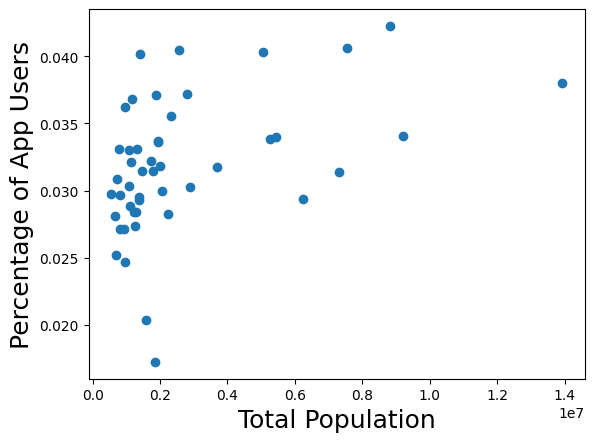

In [6]:
plt.xlabel('Total Population',fontsize = 18)
plt.ylabel('Percentage of App Users', fontsize = 18)
plt.scatter(df['Total_Population'], df['total_ratio'])
plt.show()

In [7]:
df_corr = df[['Total_Population','total_ratio']].corr()
print(df_corr)

                  Total_Population  total_ratio
Total_Population          1.000000     0.444143
total_ratio               0.444143     1.000000


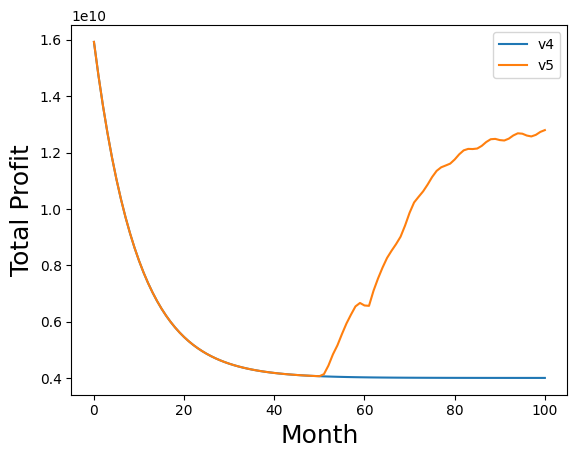

In [8]:
#ここからsimulation_v4とsimulation_v5の実験結果解析
from path_info import OUTPUT_DIR

data_v4_path = os.path.join(OUTPUT_DIR, 'simulation_v4')
data_v5_path = os.path.join(OUTPUT_DIR, 'simulation_v5')

month_data_v4_path = os.path.join(data_v4_path, 'month-wise')
month_data_v5_path = os.path.join(data_v5_path, 'month-wise')

#各月の総利益を取得
total_profit_v4 = []
total_profit_v5 = []

for i in range(101):
    file_name = 'month_' + str(i) + '.csv'
    data_v4 = pd.read_csv(os.path.join(month_data_v4_path, file_name))
    data_v5 = pd.read_csv(os.path.join(month_data_v5_path, file_name))
    total_profit_v4.append(data_v4['Revenue'].sum())
    total_profit_v5.append(data_v5['Revenue'].sum())

plt.xlabel('Month',fontsize = 18)
plt.ylabel('Total Profit', fontsize = 18)
plt.plot(total_profit_v4, label='v4')
plt.plot(total_profit_v5, label='v5')
plt.legend()
plt.show()

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(x=df['Total_Population'],y=df['total_ratio'],mode='markers',name='Prefecture Data',marker=dict(size=10)),
])

fig.update_layout(
    xaxis_title='Total Population',
    yaxis_title='Percentage of App Users',
    font=dict(
        family='Arial',
        size=20,
        color='Black'
    )
)

fig.write_image('scatter_plot.jpg', scale=20)

In [10]:
plotly_total_profit_v4 = []
plotly_total_profit_v5 = []

for i in range(101):
    file_name = 'month_' + str(i) + '.csv'
    data_v4 = pd.read_csv(os.path.join(month_data_v4_path, file_name))
    data_v5 = pd.read_csv(os.path.join(month_data_v5_path, file_name))
    plotly_total_profit_v4.append(data_v4['Revenue'].sum())
    plotly_total_profit_v5.append(data_v5['Revenue'].sum())

fig_2 = go.Figure(data=[
    go.Scatter(y=plotly_total_profit_v4,mode='lines',name='定価'),
    go.Scatter(y=plotly_total_profit_v5,mode='lines',name='変動価格')
])

fig_2.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Profit',
    font=dict(
        family='Arial',
        size=20,
        color='Black'
    )
)

fig_2.show()

fig_2.write_image('line_plot.jpg', scale=20)

In [11]:
#各都道府県の利用者数をv4とv5で比較
prefecture_data_v4 = os.path.join(data_v4_path, 'pref-wise')
prefecture_data_v5 = os.path.join(data_v5_path, 'pref-wise')

x_axis = []
prefecture_data_v4_list = []
prefecture_data_v5_list = []

for f in os.listdir(prefecture_data_v4):
    x_axis.append(f.split('.')[0])
    data_v4 = pd.read_csv(os.path.join(prefecture_data_v4, f))
    data_v5 = pd.read_csv(os.path.join(prefecture_data_v5, f))
    prefecture_data_v4_list.append(data_v4['n_values'].tail(1).item())
    prefecture_data_v5_list.append(data_v5['n_values'].tail(1).item())

bigger_than_v4 = 0
for i in range(len(x_axis)):
    if prefecture_data_v5_list[i] > prefecture_data_v4_list[i]:
        bigger_than_v4 += 1

print('v5の方がv4よりも多い都道府県の数:', bigger_than_v4)



v5の方がv4よりも多い都道府県の数: 47


In [26]:
fig_3 = go.Figure(data=[
    go.Scatter(x=x_axis,y=prefecture_data_v4_list,mode='markers',name='定価',marker=dict(size=10)),
    go.Scatter(x=x_axis,y=prefecture_data_v5_list,mode='markers',name='変動価格',marker=dict(size=10))
])

fig_3.update_layout(
    xaxis_title='Prefecture',
    yaxis_title='Number of App Users',
    autosize=True,
    font=dict(
        family='Arial',
        size=20,
        color='Black'
    )
)

fig_3.write_image('scatter_plot_pref.jpg', scale=20, width=1500, height=400)